<a href="https://colab.research.google.com/github/Jalpapatel12/devnet-practice/blob/master/ANN_Classification_Mnist_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
(train_data, train_labels), (test_data, test_labels) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Num of Images = 60000
# image shape = (28 x 28)
train_data.shape

(60000, 28, 28)

In [ ]:
test_data.shape

(10000, 28, 28)

In [ ]:
train_labels[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
# Image as an array of pixels with shape = 28x28
# Each pixel will range 0-255
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

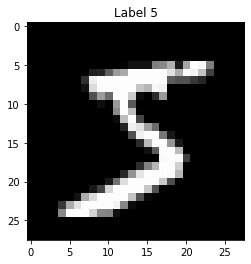

In [ ]:
img = train_data[0]
# display image
plt.imshow(img, cmap = 'gray')
plt.title('Label %i' %train_labels[0])
plt.show()

In [ ]:
# GrayScale Image Shape = 28x28
image_height = 28
image_width = 28

##### Reshaping of Target into One-Hot Encoding

In [ ]:
# For multiclass use one-hot encoding
from tensorflow.keras.utils import to_categorical
num_classes = 10
train_labels_cat = to_categorical(train_labels, num_classes)
test_labels_cat = to_categorical(test_labels, num_classes)

In [ ]:
train_labels_cat[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# 784 = 28 x 28
train_digits = train_data.reshape(60000, 784)
test_digits = test_data.reshape(10000, 784)

In [ ]:
train_digits[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

##### Image Normalization

In [ ]:
# image pixel (0-255) is scaled now b/w (0-1)
train_digits1 = train_digits.astype('float32') / 255
test_digits2 = test_digits.astype('float32') / 255

##### Split Data into Train & Validation

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into train & test (80%-20%)
train_data, val_data, train_label, val_label = train_test_split(train_digits1, train_labels_cat, test_size = 0.1, random_state=2)

In [ ]:
train_data.shape

(54000, 784)

In [ ]:
train_label.shape

(54000, 10)

In [ ]:
val_data.shape

(6000, 784)

##### ANN Classification

In [ ]:
# Dense Neural Network
from tensorflow.keras.layers import Dense, Dropout
# Sequential Connection with Neural Network
from tensorflow.keras.models import Sequential
# Optimizers for Regression Model
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    # Sequential Neural Network - Feedforward Neural Network
    model = Sequential()
    # Units = Num of Neurons (2*pow(n)), input shape = Num of Features
    model.add(Dense(units = 64, activation = 'relu', input_shape = [train_data.shape[1]]))
    model.add(Dropout(0.2))
    # Hidden Layer - I
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(0.2))
    # Hidden Layer - II
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dropout(0.2))
    # Output Layer - 
    model.add(Dense(units = 10, activation = 'softmax'))
    # Optimizers
    optimizers = Adam(learning_rate = 0.001)
    # Model Compiler
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics=['accuracy'])
    
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [ ]:
history = model.fit(train_data, train_label, epochs=50, batch_size=32, validation_data = (val_data,val_label))

Epoch 1/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3809 - accuracy: 0.8831 - val_loss: 0.1693 - val_accuracy: 0.9505
Epoch 2/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2013 - accuracy: 0.9407 - val_loss: 0.1335 - val_accuracy: 0.9590
Epoch 3/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1672 - accuracy: 0.9495 - val_loss: 0.1178 - val_accuracy: 0.9640
Epoch 4/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1503 - accuracy: 0.9526 - val_loss: 0.1114 - val_accuracy: 0.9655
Epoch 5/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1368 - accuracy: 0.9594 - val_loss: 0.1068 - val_accuracy: 0.9652
Epoch 6/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1263 - accuracy: 0.9621 - val_loss: 0.0960 - val_accuracy: 0.9692
Epoch 7/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1168 - accuracy: 0.9644 - val_loss: 0.0941 - val_accuracy:

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.380947,0.883111,0.169286,0.950500
1,0.201253,0.940722,0.133461,0.959000
2,0.167166,0.949519,0.117823,0.964000
3,0.150269,0.952611,0.111441,0.965500
4,0.136789,0.959426,0.106812,0.965167
5,0.126328,0.962130,0.096029,0.969167
6,0.116827,0.964389,0.094054,0.971833
7,0.111351,0.965259,0.085345,0.974167
8,0.105322,0.966537,0.079570,0.973667
9,0.101117,0.968389,0.088020,0.974333


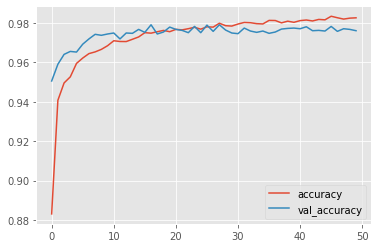

In [ ]:
plt.style.use('ggplot')
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

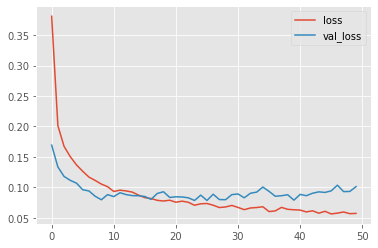

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

##### Make New Predictions

In [ ]:
import cv2

In [ ]:
# 0 stands for reading image as grayscale
img = cv2.imread('/content/2.png', 0)

In [ ]:
img.shape

(541, 484)

In [ ]:
img = cv2.resize(img, (28,28))

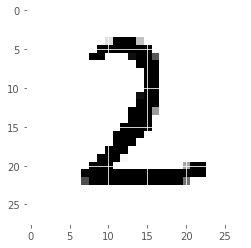

In [ ]:
plt.imshow(img, cmap = 'gray')

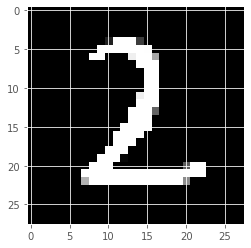

In [ ]:
img1 = cv2.bitwise_not(img)
plt.imshow(img1, cmap = 'gray')

In [ ]:
img_new = img1.reshape(1, 784)

In [ ]:
model.predict(img_new)

1/1 [==============================] - 0s 110ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
yhat = np.argmax(model.predict(img_new))
print(yhat)

1/1 [==============================] - 0s 32ms/step
2


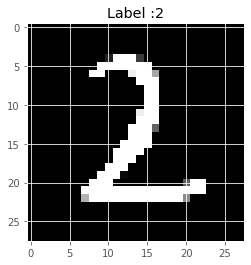

In [ ]:
plt.imshow(img1, cmap = 'gray')
plt.title('Label :%i' %yhat)
plt.show()